# Logistic Regression
The type of Regression in which we classify the thing inot categories is called logsitic regression\
This Regression is used for classification of things.
## Types of classification
### 1. Binary classification
the types classification in which predicted value will come in two classes. for example (male and female,ture and flase,yes and no, survivded and not survived)
### 2. Multi-class classification
the type classification which more than two classes for examle shirt color is (blue, red, green)
### 3. Multi-label classification
the type of classification in which we more then one label on one thing(for example ,Movie is animal labels are hindi ,thriller, bollywood,action,boxoffice pa hit )
#### Evulation metrices of logistic regression
1. `Acuracy score:` how accurate our model is predicting
2. `Recall score:` 
3. `precision score`
4. `f1 score`
5. `confusion matrix`


1. **_Mertices_** mean to check measure how well our model is performing

# Logistic Regression
`Logistic Regression` is set of classification used to assgin observation to a set of discret classes.Unlike linear regression which output contionous number values, logistic regression transform its output using logistic sigmoid function to return a probability value which can be mapped to two or more discret classes.\
**logistic regression can be used for**
1. Binary classificaion
2. Multi-class classification
3. one vs/rest classification
### assumptions of logistic regression
1. The dependent variable must be categorical in nautre
2. The idependent variable must be independent 
3. There should be no outliers in the data 
4. There should be no relation among the independent variable. This can be checked by using correlation matrix

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
df=sns.load_dataset('titanic')

### Preprocessing of Data

In [21]:
# # removing the deck coloumn
df.drop('deck',axis=1, inplace=True)
# imputing missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
# imputing missing values of embarked and embark_twon
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# encode the categorical variables using for loop
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object' or df[col].dtype.name=='category':
        df[col]=le.fit_transform(df[col])

In [22]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [23]:
# split data into x and y column
x=df.drop('survived',axis=1)
y=df['survived']

In [24]:
# split data into testing and training data
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [25]:
# model call
model= LogisticRegression()

In [26]:
#fit the model
model.fit(x_train, y_train)

c:\Users\Basit\miniconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# predict the vlaues
y_pred=model.predict(x_test)

In [29]:
# evluate the model
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('precision score:', precision_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print('f1_score: ', f1_score(y_test,y_pred))
print('confusion matriz: \n', confusion_matrix(y_test,y_pred))
print('classification_report: \n', classification_report(y_test,y_pred))

Accuracy score:  1.0
precision score: 1.0
Recall score:  1.0
f1_score:  1.0
confusion matriz: 
 [[114   0]
 [  0  65]]
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        65

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



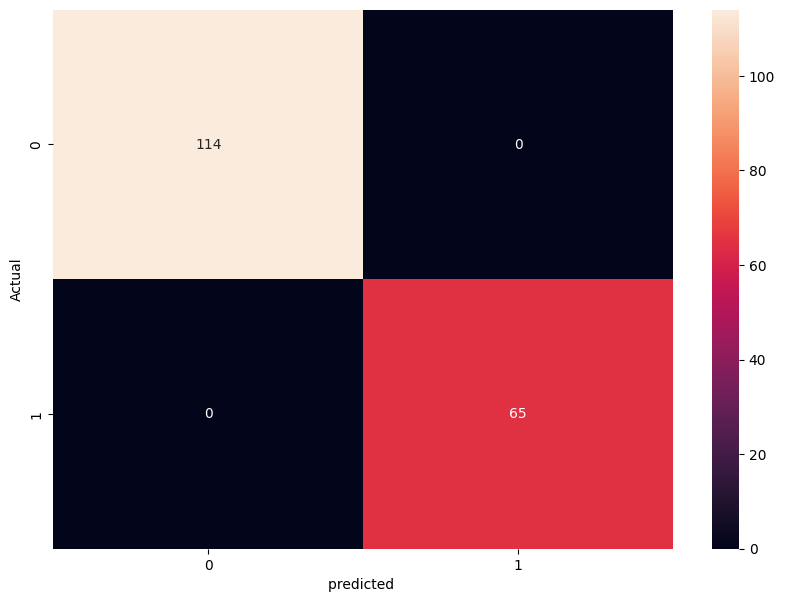

In [31]:
# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.xlabel('predicted ')
plt.ylabel('Actual')
plt.show()

In [34]:
# save the model
import pickle
pickle.dump(model,open('./saved_model_of_machine_learning/01_model_of_logistic_regression.pkl','wb'))
